### 기울기 소실과 기울기 폭발의 원인

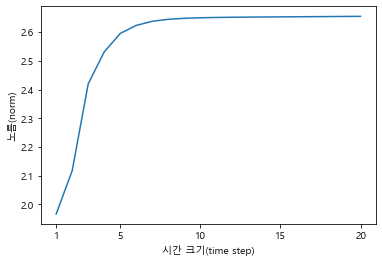

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H))

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

# Wh = np.random.randn(H, H)  # 평균:0, 표준편차:1
Wh = np.random.randn(H, H) * 0.7968

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)  # (2,3)(3,3) => (2,3)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

# print(norm_list)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

### 기울기 폭발 대책

before: [ 5.55955013  9.09244151  4.10820689  4.02757422 10.2807012   1.74458738
  9.67171065  7.24352425 14.15373244 14.93492446 13.82185844 13.78360828
  7.47200248 13.36269609  6.79697328 11.4558774 ]


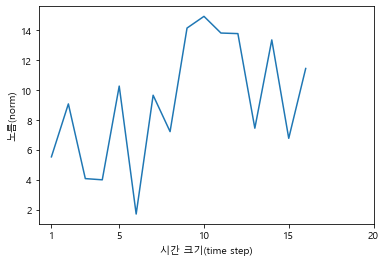

after: [0.69113849 1.13033179 0.51071397 0.50069007 1.27805094 0.21687933
 1.20234395 0.90048264 1.75952892 1.85664323 1.71827182 1.71351673
 0.92888604 1.66119081 0.84496942 1.42414361]


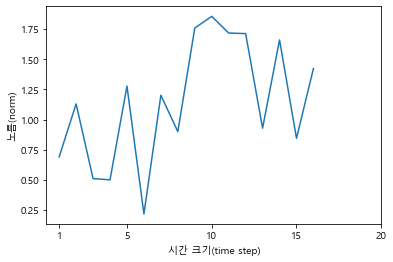

In [16]:
import numpy as np


dW1 = np.random.rand(4, 4) * 20
dW2 = np.random.rand(4, 4) * 20
grads = [dW1]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW1.flatten())
plt.plot(np.arange(len(dW1.flatten())), dW1.flatten())
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()


clip_grads(grads, max_norm)
print('after:', dW1.flatten())
# 그래프 그리기
plt.plot(np.arange(len(dW1.flatten())), dW1.flatten())
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()